# Zero-bias *(non-dissipative)* current
A quick examination of the current through the molecular junction when $\Delta\mu = 0$ eV, in the absence of a bosoniic bath coupled to the molecular vibration.

From the detailed balance relation (when $\Delta\mu = 0$):
$$
\frac{k^{R\rightarrow L}_{1\rightarrow 0}}{k^{L\rightarrow R}_{0\rightarrow 1}} = \frac{k^{L\rightarrow R}_{1\rightarrow 0}}{k^{R\rightarrow L}_{0\rightarrow 1}} = e^{\beta\omega_0}\,,
$$
and the expression of the current $I$ in terms of the rate constants. It is easy to show that $\Delta\mu = 0\implies I = 0$.

Thus, any significant deviations from nullity of the zero-bias current $I(\Delta\mu = 0)$ point to numerical instability, or a logic error in our `full_param_scan.py` code.

## ***Part I*** Examine zero-bias current

We study the conditions that lead to significant zero-bias current, and plot the distribution of values of $I(\Delta\mu = 0)$. We also examine how the zero-bias current varies with temperature.

### **Step 0:** Import relevant packages and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from param_parser import ParameterParser
import plt_utils

# plt_utils.setup_tex() <---- doesn't work with Jupyter

plt.rcParams.update({'image.aspect': 'auto'})

kB = 8.617e-5
npydir = 'MAC_aligned_focused_max_dmu0.02_no_shift'
param_file = 'aligned_focused_max_dmu0.02.json'

pp = ParameterParser(param_file)

kappa_grid, w0_grid, muL_grid, temp_grid, e_grid = \
pp.load_grids(plist=['kappa_grid', 'frequency_grid','muL_grid',\
    'temperature_grid', 'energy_grid'])

dmu_grid = muL_grid * 2

I = np.moveaxis(np.load('%s/current_non-dis.npy'%npydir),2,-1) #move dmu axis to last position to use tensor_linregress painlessly
# axes of I are now: (w0, kappa, beta, dmu)

I_zero_bias = I[:,:,:,0] #I(dmu = 0)
I_finite_bias = I[:,:,:,1:] #I(dmu > 0)

print('Mean zero-bias current = ', np.mean(I_zero_bias))
print('Mean finite-bias current = ', np.mean(I_finite_bias))


Mean zero-bias current =  -2.7670831442975987e-06
Mean finite-bias current =  0.0008513020527118264


As we can see the mean zero-bias current isn't 0 and is two orders of magnitude smaller than the finite bias voltage. This seems a bit fishy. Let's investigate further.

### **Step 1:** Current heatmaps for different $(\omega_0,\,\kappa,\,T)$ conditions
Just to get a quick visual sense of what conditions lead to the highest zero-bias currents.


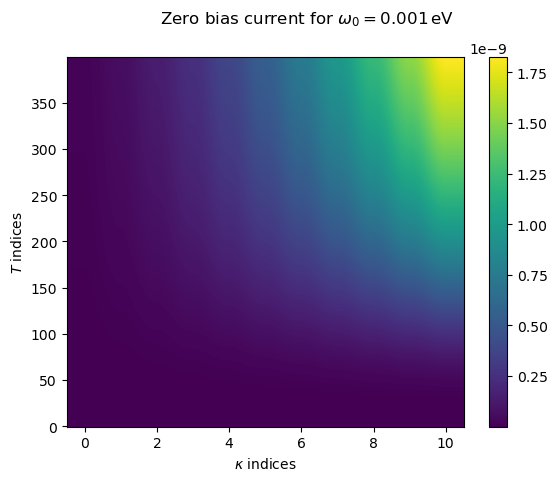

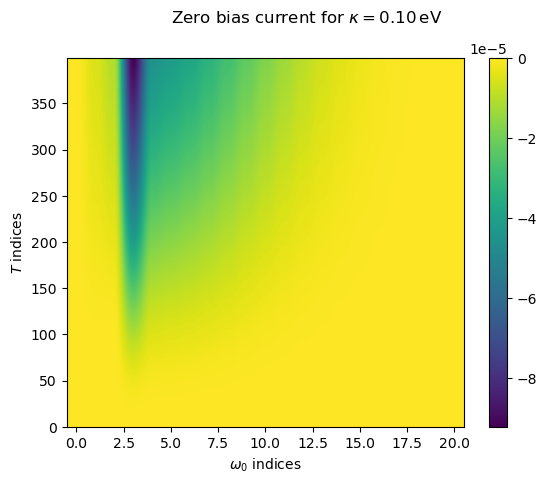

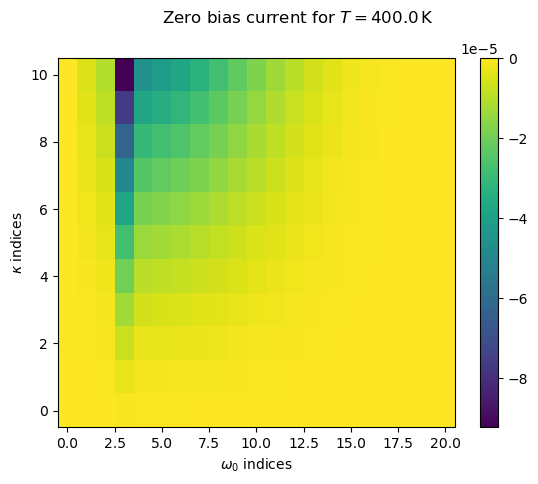

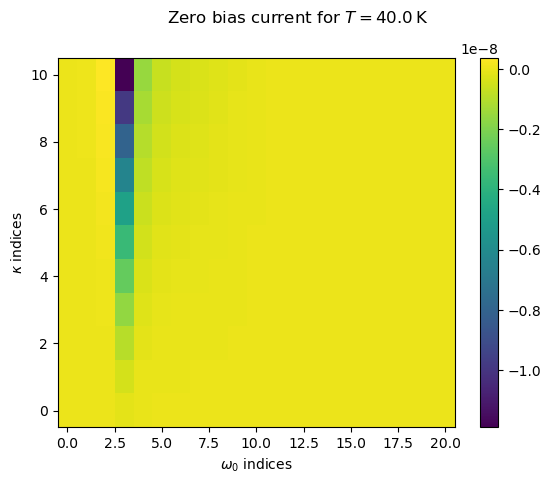

Argmax of zero-bias current:  (2, 10, 70)
Corresponds to:
     omega_0 = 0.0109 eV
     kappa = 0.1000 eV
     T = 103.15789473684211 K


In [2]:
plt.imshow(I_zero_bias[0].T,origin='lower')
plt.suptitle('Zero bias current for $\omega_0 = %5.3f\,$eV'%w0_grid[0])
plt.xlabel('$\kappa$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,-1,:].T,origin='lower')
plt.suptitle('Zero bias current for $\kappa = %4.2f\,$eV'%kappa_grid[-1])
plt.xlabel('$\omega_0$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,-1].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[-1])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,0].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[0])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

fishy_inds  = np.unravel_index(np.argmax(I_zero_bias),I_zero_bias.shape)
print('Argmax of zero-bias current: ', fishy_inds)
print(f'Corresponds to:\n \
    omega_0 = {w0_grid[fishy_inds[0]]:6.4f} eV\n \
    kappa = {kappa_grid[fishy_inds[1]]:6.4f} eV\n \
    T = {temp_grid[fishy_inds[2]]} K')

Now we fix each condition to the argmax of the zero-bias current $\{\tilde{\omega}_0,\,\tilde{\kappa},\,\tilde{T}\}$ and plot the $I(\Delta\mu = 0)$ heatmap along the other two axes.
Again, this is just to get a visual sense of how the zero-bias current varies with $(\omega_0,\,\kappa,\,T)$.

It's weird that the max zero-bias current occurs at $\tilde{T} = 68$ K... would expect to this at a much higher temperature. Should investigate this later. For now, we'll just plot the current heatmap at $\tilde{T}$ and the max temperature of our scan (i.e. 400K)...

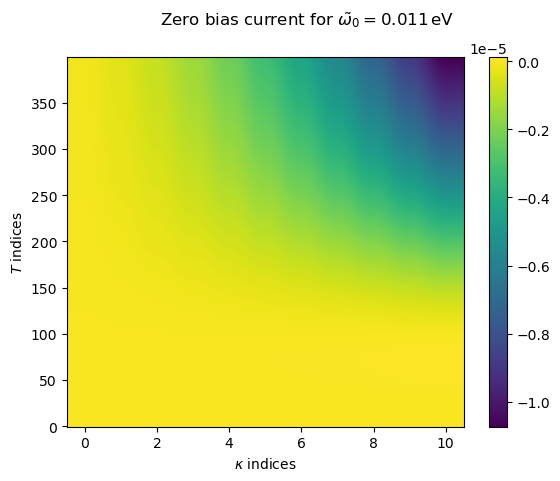

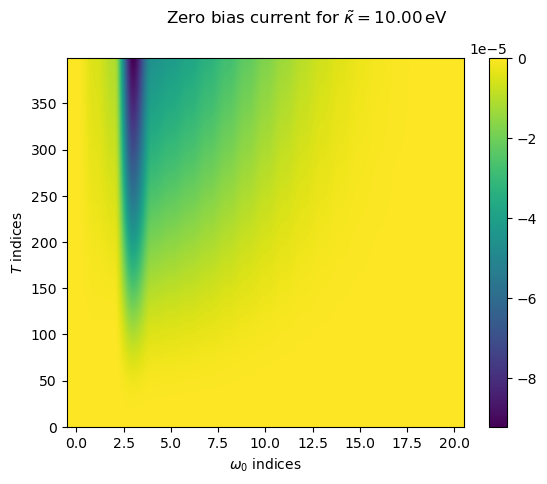

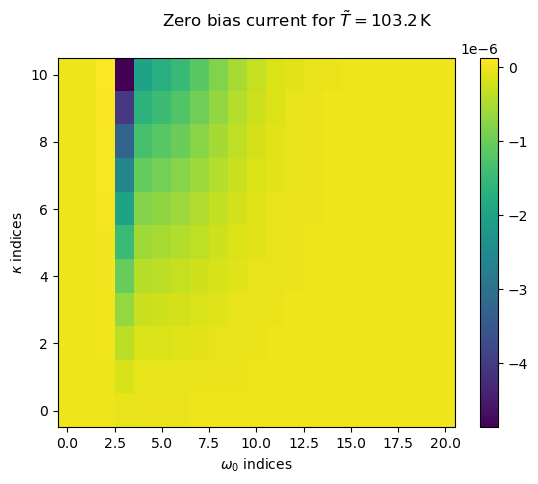

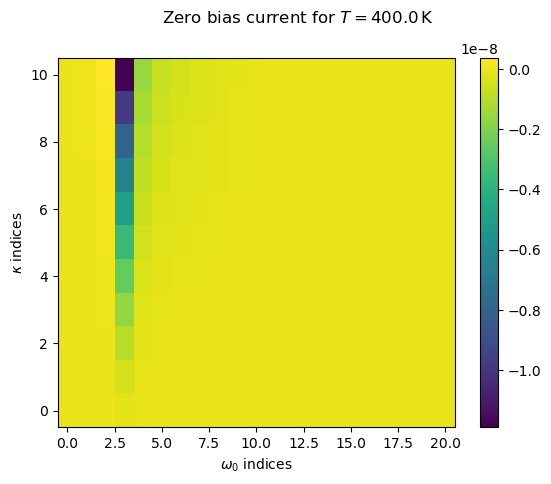

In [3]:
plt.imshow(I_zero_bias[fishy_inds[0]].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{\omega}_0 = %5.3f\,$eV'%w0_grid[fishy_inds[0]])
plt.xlabel('$\kappa$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,fishy_inds[1],:].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{\kappa} = %4.2f\,$eV'%fishy_inds[1])
plt.xlabel('$\omega_0$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,fishy_inds[2]].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{T} = %5.1f\,$K'%temp_grid[fishy_inds[2]])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,0].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[-1])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

### **Step 2:** Plot the current distributions, both at $\Delta\mu = 0$ eV and for $\Delta\mu > 0$ eV.

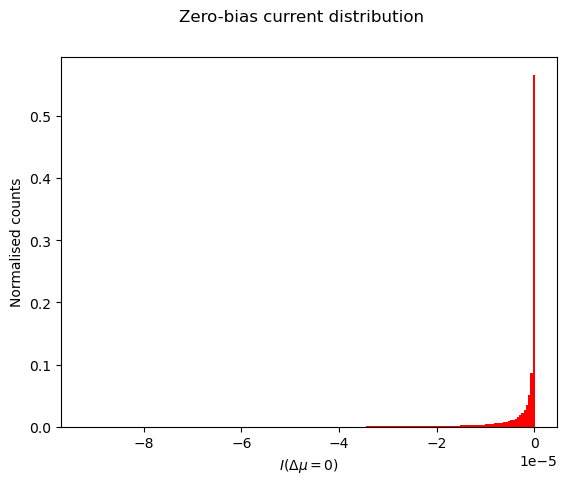

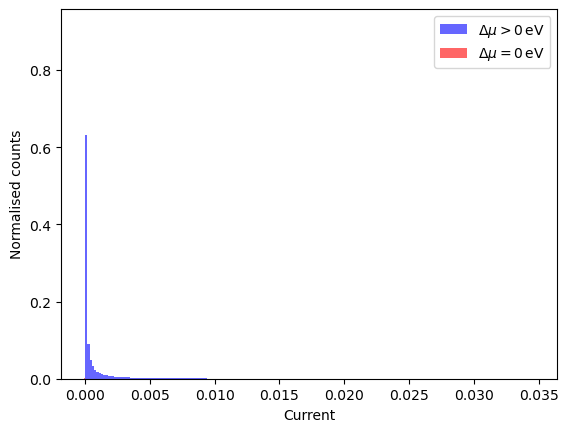

In [4]:
#Histogram of zero-bias current
plt_utils.histogram(I_zero_bias, nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True)
plt.suptitle('Zero-bias current distribution')
plt.show()

#Histogram of all current, with dmu = 0 and dmu > 0 plotted separately
plt_utils.histogram(I_finite_bias,nbins=200,xlabel='Current',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\mu > 0\,$eV'})
plt_utils.histogram(I_zero_bias,nbins=10,xlabel='Current',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\mu = 0\,$eV'})
plt.legend()
plt.show()

**Remark:** The spurious zero-bias current seems to only be negative... This is strange. We'll get back to this later.

### **Step 3:** Temperature dependence of zero-bias current.

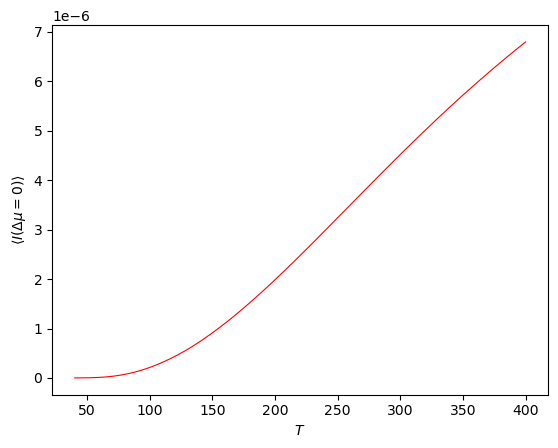

In [5]:
avg = np.mean(np.abs(I_zero_bias),axis=(0,1))
std = np.std(np.abs(I_zero_bias),axis=(0,1))
plt.plot(temp_grid,avg,'r-',lw=0.8)
#plt.plot(temp_grid,avg+std,'r--',lw=0.8)
#plt.plot(temp_grid,avg-std,'r--',lw=0.8)
plt.xlabel('$T$')
plt.ylabel('$\langle I(\Delta\mu = 0)\\rangle$')
plt.show()

## ***Part II*** Investigate how changing the model parameters affects the zero-bias current

It seems that for now, our code predicts $I(\Delta\mu = 0) < 0$. This is problematic. To understand why, we tinker with our choice of parameters and check out it alters our predictions for $I(\Delta\mu=0)$.

### **Step 4:** Examine consequences of increasing $\Gamma_L$ and $\Gamma_R$

**Hypothesis:** The values of the MO-lead couplings $\langle\Gamma_{\alpha}\rangle$ ($\alpha\in\{L,R\}$) are very small in our simulations ($\approx 2$ meV, see cell below). This leads to very narrow Lorentzians. If our integration grid isn't fine enough, the integral evaluation method could very well miss these Lorentzians' sharp variations which could lead to some pretty serious inaccuracies.

**Test 1 :** Increase $\Gamma_{\alpha}$. This will broaden the Lorentzians and should reduce/eliminate the numerical errors from the integral evaluation.

**Test 2:** Refine energy grid. In the calculations that yielded the results in part I, $\epsilon\in [-2\,\text{eV};2\,\text{eV}]$, and is sampled at 4000 points (uniformly spaced). Since most of the action happens very close to 0 (at the meV scale), we reduce the energy range to $[-0.5\,\text{eV};0.5\,\text{eV}]$ and increase the number of points to 10000, the refines the energy grid resolution tenfold.

Let's first plot the Lorentzians corresponding to different $\Gamma_{\alpha}$ values to get an in idea of what we're dealing with.

Coupling to left lead = 0.00237 eV
Coupling to right lead = 0.00165 eV
Donor energy = 0.03762 eV
Acceptor energy = 0.05253 eV


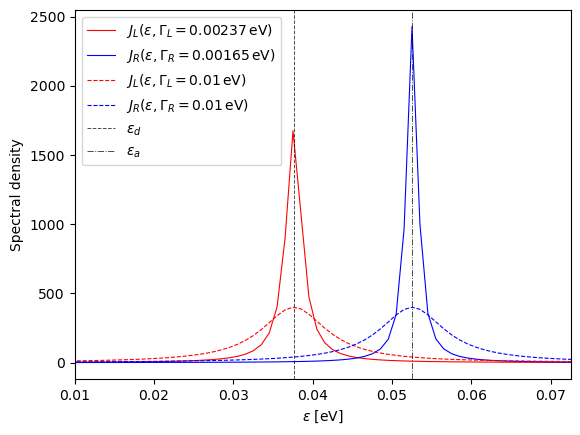

In [6]:
from rate_utils import lor

# Get values of couplings used to derive the above currents
e_d, e_a,  gamL, gamR, _ = pp.load_intrinsic()

bigga = 0.01 # Big gamma

print('Coupling to left lead = {:7.5f} eV'.format(gamL))
print('Coupling to right lead = {:7.5f} eV'.format(gamR))

print('Donor energy = {:7.5f} eV'.format(e_d))
print('Acceptor energy = {:7.5f} eV'.format(e_a))

lorL =lor(e_grid,gamL,e_d)
lorR = lor(e_grid,gamR,e_a)

lorL_big_ga =lor(e_grid,bigga,e_d)
lorR_big_ga = lor(e_grid,bigga,e_a)

plt.plot(e_grid,lorL,'r-',lw=0.8,label='$J_L(\\varepsilon,\Gamma_L={:7.5f}\,$eV$)$'.format(gamL))
plt.plot(e_grid,lorR,'b-',lw=0.8,label='$J_R(\\varepsilon,\Gamma_R={:7.5f}\,$eV$)$'.format(gamR))
plt.plot(e_grid,lorL_big_ga,'r--',lw=0.8,label='$J_L(\\varepsilon,\Gamma_L={:4.2f}\,$eV$)$'.format(bigga))
plt.plot(e_grid,lorR_big_ga,'b--',lw=0.8,label='$J_R(\\varepsilon,\Gamma_R={:4.2f}\,$eV$)$'.format(bigga))
plt.axvline(e_d,0,1,c='k',ls='--',alpha=0.7,label='$\\varepsilon_d$',lw=0.7)
plt.axvline(e_a,0,1,c='k',ls='-.',alpha=0.7,label='$\\varepsilon_a$',lw=0.7)
plt.legend()
plt.xlabel('$\\varepsilon$ [eV]')
plt.ylabel('Spectral density')
plt.xlim(0.01,e_a+0.02)
plt.show()




OK, so increasing couplings by a factor of 5 really smoothes out the curves; should help with the integral evaluation.

As a sanity check, let's carry the integral of a single Lorentzian. Analytically we have:

$$
\int_{\mathbb{R}} \frac{\Gamma}{x^2 + \frac{\Gamma^2}{4}}\,\text{d}x = 2\pi\,.
$$

Let's check how far off we are from this integral's analytic value when integrating numerically using Simpson's method (as implemented in SciPy).

Let's first evaluate the weight of the tails, by checking the value of the $J_L$ far from its maximum (i.e. $\varepsilon_d$ ).

In [7]:
print('Max value of Lorentzian: {:5.3e} (attained at E = {:5.3e} eV)'.format(np.max(lorL),e_grid[np.argmax(lorL)]))

# Closer to maximum (but still rather far)
for e in [0,0.01]:
    tail_ind = np.max((e_grid < e).nonzero()[0])
    print(tail_ind)
    print('Value of Lorentzian at E = {:5.3f} eV: {:5.3e}'.format(e_grid[tail_ind],lorL[tail_ind]))



Max value of Lorentzian: 1.675e+03 (attained at E = 3.751e-02 eV)
1999
Value of Lorentzian at E = -0.001 eV: 1.628e+00
2009
Value of Lorentzian at E = 0.010 eV: 2.989e+00


Judging from this, we expect, agreement up to $\sim 10^{-3}$ (being lenient).

It's also worth noting that the position of the maximum is a little off; it should be at $\varepsilon_d = 0.03762$ eV.

Let's now compare the analytical and numerical values of the integrals.

In [8]:
from scipy.integrate import simpson

exact = 2.0 * np.pi
numerical = simpson(lorL, e_grid)

print('Exact value of integral = ', exact)
print('Numerical value of integral = ', numerical)
print('Disagreement: {} %'.format(100 * np.abs(exact - numerical)/exact))

Exact value of integral =  6.283185307179586
Numerical value of integral =  6.2865349576469916
Disagreement: 0.05331134295176341 %


The agreement between both values is actually quite good... Perhaps the issue arises when applying a Fermi-Dirac window to the integrand? It's quite hard to check this however because the integral is hard to evaluate analytically once we add the Fermi-Dirac factor to the integrand.

Let us still compare the exact and numerical values of the broadened Lorentzian (i.e. with $\Gamma = 0.01$ eV).

In [9]:
print('Max of broadened Lorentzian attained at E = {} eV'.format(e_grid[np.argmax(lorL_big_ga)]))

numerical = simpson(lorL_big_ga,e_grid)

print('Exact value of integral = ', exact)
print('Numerical value of integral = ', numerical)
print('Disagreement: {} %'.format(100 * np.abs(exact - numerical)/exact))

Max of broadened Lorentzian attained at E = 0.03750937734433624 eV
Exact value of integral =  6.283185307179586
Numerical value of integral =  6.273181788787927
Disagreement: 0.15921094003433092 %


Oddly enough, this disagreement is much greater than the disagreement between the the sharp Lorentzian's exact and numerical values... Perhaps this is due to the fatter tails. Let's check this.

In [10]:
print('Tip/tail of sharp Lorentzian = ', lorL[-1]/np.max(lorL))
print('Tip/tail of broad Lorentzian = ', lorL_big_ga[-1]/np.max(lorL_big_ga))

print('Value at tail (2 eV) of sharp Lorentzian = ', lorL[-1])
print('Value at tail (2 eV) of broad Lorentzian = ', lorL_big_ga[-1])

Tip/tail of sharp Lorentzian =  3.6697455318134336e-07
Tip/tail of broad Lorentzian =  6.495016313230062e-06
Value at tail (2 eV) of sharp Lorentzian =  0.0006147550965582426
Value at tail (2 eV) of broad Lorentzian =  0.0025967528977362824


An order of magnitude difference... pretty big but not dramatic enough to explain the differences in disagreements noted above. 

Second (and final) test of the fat-tails explanation: let's try expanding the energy grid while keeping the same energy resolution.

In [11]:
e_max = 500
npts = int( (e_max / e_grid[-1]) * e_grid.size * 2 )
print(e_grid.size)
print(npts)
e_grid2 = np.linspace(-e_max,e_max,npts)

lorL2 = lor(e_grid2, gamL, e_d)
lorL_big_ga2 = lor(e_grid2, 0.01, e_d)

numerical2 = simpson(lorL2, e_grid2)
print('New disagreement (sharp) = {} %'.format(100 * np.abs(exact - numerical2)/exact))

numerical2 = simpson(lorL_big_ga2, e_grid2)
print('New disagreement (broad) = {} %'.format(100 * np.abs(exact - numerical2)/exact))

4000
2000000
New disagreement (sharp) = 0.00015574631084233463 %
New disagreement (broad) = 0.0006366197759905165 %


Even for such an absurdly large energy range, the analytic-numerical disagreement still seems to remain in favour of the narrow Lorentzian. This is unexpected.

Regardless of this result, let's examine what happens to $I(\Delta\mu = 0 )$ when we set $\Gamma_L = \Gamma_R = 0.01$ eV.

Max zero-bias current for gamma = 0.01 eV:  7.494005416219807e-16


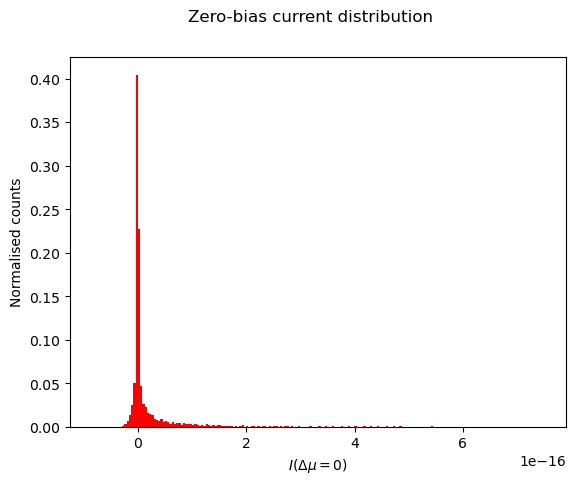

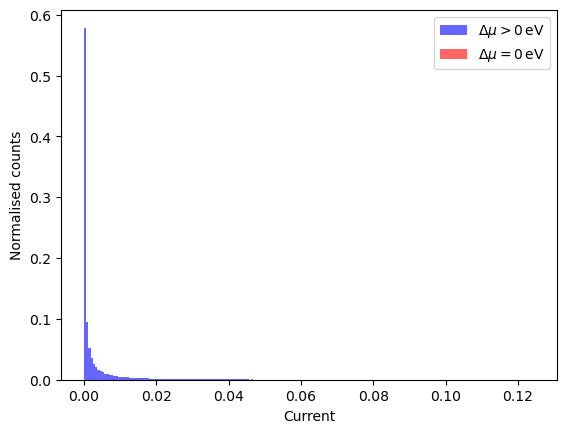

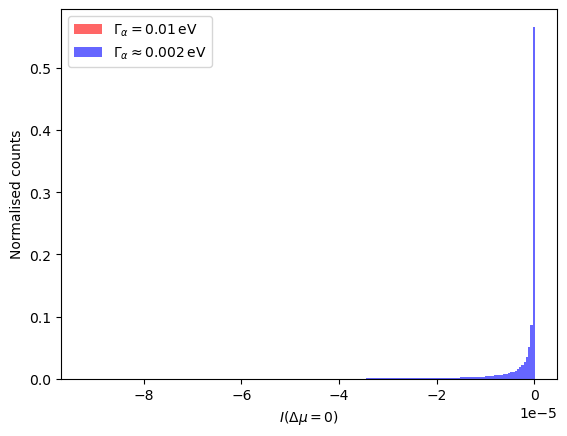

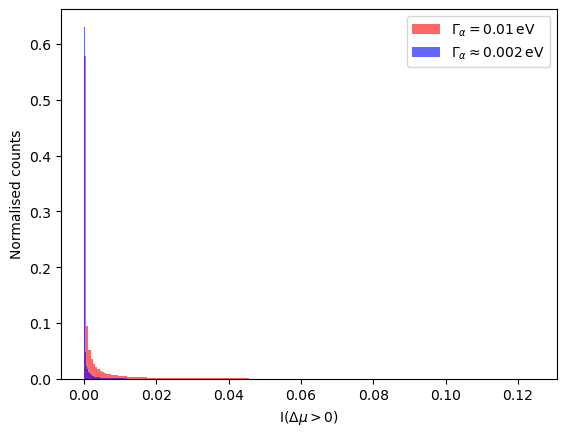

In [12]:
npydir_bigga = 'MAC_aligned_focused_max_dmu0.02_no_shift_ga_0.01'
I_bigga = np.moveaxis(np.load('%s/current_non-dis.npy'%npydir_bigga),2,-1) # keep shape consistent with previous current array

I_0bias_bigga = I_bigga[:,:,:,0]

print('Max zero-bias current for gamma = {} eV: '.format(bigga), np.max(I_0bias_bigga))

#Histogram of zero-bias current
plt_utils.histogram(I_0bias_bigga, nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True)
plt.suptitle('Zero-bias current distribution')
plt.show()

#Histogram of all current, with dmu = 0 and dmu > 0 plotted separately
plt_utils.histogram(I_bigga[:,:,:,1:],nbins=200,xlabel='Current',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\mu > 0\,$eV'})
plt_utils.histogram(I_0bias_bigga,nbins=10,xlabel='Current',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\mu = 0\,$eV'})
plt.legend()
plt.show()

# Compare zero-bias current distributions between small and large gammas
plt_utils.histogram(I_0bias_bigga,nbins=10,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Gamma_{{\\alpha}} = {:4.2f}\,$eV'.format(bigga)})
plt_utils.histogram(I_zero_bias,nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Gamma_{\\alpha} \\approx 0.002\,$eV'})
plt.legend()
plt.show()

# Compare finite bias current distributions between small and large gammas
plt_utils.histogram(I_bigga[:,:,:,1:],nbins=200,xlabel='I($\Delta\mu > 0$)',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Gamma_{{\\alpha}} = {:4.2f}\,$eV'.format(bigga)})
plt_utils.histogram(I[:,:,:,1:],nbins=200,xlabel='I($\Delta\mu > 0$)',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Gamma_{\\alpha} \\approx 0.002\,$eV'})
plt.legend()
plt.show()

Curiously, this really seems to have done the trick; when $\Gamma_{\alpha} = 0.01$ eV, $|I(\Delta\mu = 0)\lesssim 10^{-16}|$. Perhaps this is due to the fact that numerical inaccuracies due to the grid coarseness get amplified when considering the effect of the Fermi-Dirac window and when multiplying two narrow Lorentzians. 

We can check this by:
* Comparing analytical and numerical results for the integral of the product of two Lorentzians;
* Running **Test 2**

Let's start with the first bullet point. Analytically, we have:
$$
\int_{\mathbb{R}} J_L(\varepsilon)J_R(\varepsilon)\text{d}\varepsilon = \int_{\mathbb{R}} \frac{\Gamma_L}{(\varepsilon - \varepsilon_d) + \Gamma_L^2/4}\,\cdot\,\frac{\Gamma_R}{(\varepsilon - \varepsilon_a) + \Gamma_R^2/4}\,\text{d}\varepsilon\\
= \frac{2\pi(\Gamma_L + \Gamma_R)}{(\varepsilon_d - \varepsilon_a)^2 + \frac{(\Gamma_L + \Gamma_R)^2}{4}}\,.
$$

Disagreement [narrow] = 0.007090749920056295 %
Disagreement [broad] = 2.1436949715079077e-08 %


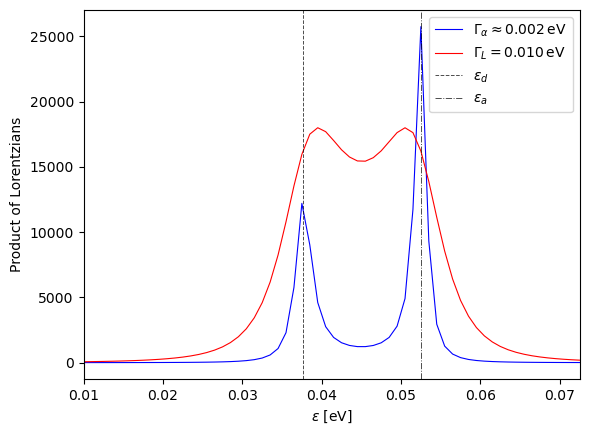

In [13]:
narrow_num = simpson(lorL*lorR, e_grid)
narrow_ana = 2.0 * np.pi * (gamL + gamR) / ((e_d-e_a)**2 + 0.25*(gamL+gamR)**2)
print('Disagreement [narrow] = {} %'.format(np.abs(narrow_num - narrow_ana)/narrow_ana))

broad_num = simpson(lorL_big_ga*lorR_big_ga, e_grid)
broad_ana = 4.0 * np.pi * bigga / ((e_d-e_a)**2 + bigga**2)
print('Disagreement [broad] = {} %'.format(np.abs(broad_num - broad_ana)/broad_ana))

# We also plot the products to see what we're comparing
plt.plot(e_grid,lorL*lorR,'b-',lw=0.8,label='$\Gamma_{{\\alpha}}\\approx{:5.3f}\,$eV'.format(gamL))
plt.plot(e_grid,lorL_big_ga*lorR_big_ga,'r-',lw=0.8,label='$\Gamma_L={:5.3f}\,$eV'.format(bigga))
plt.axvline(e_d,0,1,c='k',ls='--',alpha=0.7,label='$\\varepsilon_d$',lw=0.7)
plt.axvline(e_a,0,1,c='k',ls='-.',alpha=0.7,label='$\\varepsilon_a$',lw=0.7)
plt.legend()
plt.xlabel('$\\varepsilon$ [eV]')
plt.ylabel('Product of Lorentzians')
plt.xlim(0.01,e_a+0.02)
plt.show()

Remarkably, the broad Lorentzians now display significantly better agreement (by 5 orders of magnitude!) than the narrow ones.

***Conclusion:*** Even though the coarseness of the $\varepsilon$ grid had very little effect on the accuracy of the integral of a *single Lorentzian* , these small numerical inaccuracies compound when taking the *product of two Lorentzians*, leading to significant divergence between the numerical estimate of the integral and its actual analytical value. One can only imagine how adding a Fermi-Dirac window to the integrand further exacerbates this problem.

For completeness, let us now run **Test 2**. Before proceeding let's just make sure we're not losing too much precision by restricting the energy range to $|\varepsilon| < 0.5$ eV.

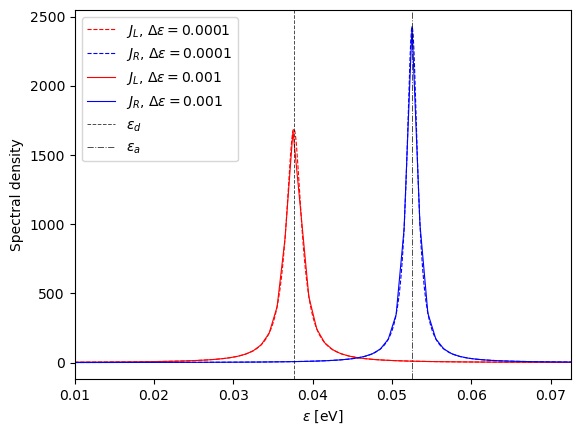

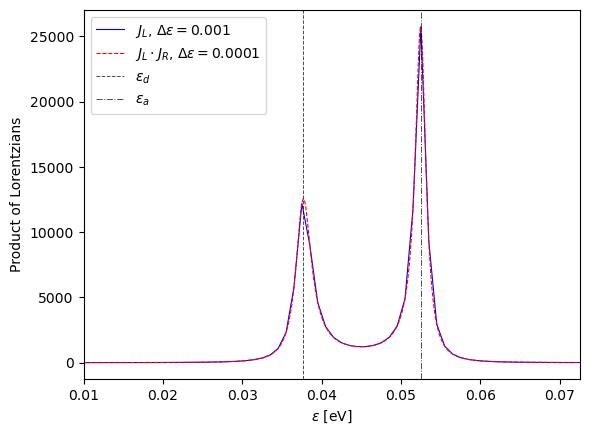

Disagreement [narrow, fine grid] = 1.9595758406128417e-07 %


In [29]:
param_file_fine_egrid = 'aligned_laser-focused_max_dmu0.02.json'

pp_fine = ParameterParser(param_file_fine_egrid)
e_grid_fine = pp_fine.load_grids(['energy_grid'])[0]
de_fine = e_grid_fine[1] - e_grid_fine[0]

de = e_grid[1] - e_grid[0]

lorL_fine = lor(e_grid_fine,gamL,e_d)
lorR_fine = lor(e_grid_fine,gamR,e_a)

# Let's first plot the narrow Lorentzians on this refined energy grid
plt.plot(e_grid_fine,lorL_fine,'r--',lw=0.8,label='$J_L$, $\Delta\\varepsilon = {:5.4f}$'.format(de_fine))
plt.plot(e_grid_fine,lorR_fine,'b--',lw=0.8,label='$J_R$, $\Delta\\varepsilon = {:5.4f}$'.format(de_fine))
plt.plot(e_grid,lorL,'r-',lw=0.8,label='$J_L$, $\Delta\\varepsilon = {:5.3f}$'.format(de))
plt.plot(e_grid,lorR,'b-',lw=0.8,label='$J_R$, $\Delta\\varepsilon = {:5.3f}$'.format(de))
plt.axvline(e_d,0,1,c='k',ls='--',alpha=0.7,label='$\\varepsilon_d$',lw=0.7)
plt.axvline(e_a,0,1,c='k',ls='-.',alpha=0.7,label='$\\varepsilon_a$',lw=0.7)
plt.legend()
plt.xlabel('$\\varepsilon$ [eV]')
plt.ylabel('Spectral density')
plt.xlim(0.01,e_a+0.02)
plt.show()

# Let's now plot the product of these Lorentzians and compare with the coarse grid
plt.plot(e_grid,lorL*lorR,'b-',lw=0.8,label='$J_L$, $\Delta\\varepsilon = {:5.3f}$'.format(de))
plt.plot(e_grid_fine,lorL_fine * lorR_fine,'r--',lw=0.8,label='$J_L\cdot J_R$, $\Delta\\varepsilon = {:5.4f}$'.format(de_fine))
plt.axvline(e_d,0,1,c='k',ls='--',alpha=0.7,label='$\\varepsilon_d$',lw=0.7)
plt.axvline(e_a,0,1,c='k',ls='-.',alpha=0.7,label='$\\varepsilon_a$',lw=0.7)
plt.legend()
plt.xlabel('$\\varepsilon$ [eV]')
plt.ylabel('Product of Lorentzians')
plt.xlim(0.01,e_a+0.02)
plt.show()

narrow_num_fine = simpson(lorR_fine*lorL_fine,e_grid_fine)
print('Disagreement [narrow, fine grid] = {} %'.format(np.abs(narrow_num_fine - narrow_ana)/narrow_ana))


OK, so the accuracy gain by increasing the energy resolution tenfold (while also reducing the integration range) is comparable to that obtained from broadening the Lorentzians by a factor of $\sim 5$.

It's also worth noting that the high-resolution plots don't look dramatically different from the low-resolution ones, yet the difference in numerical integration accuracy significant (several orders of magnitude).

Now, let's examine the results for the zero-bias current using this refined energy grid.

Max zero-bias current for fine grid =   2.220446049250313e-16


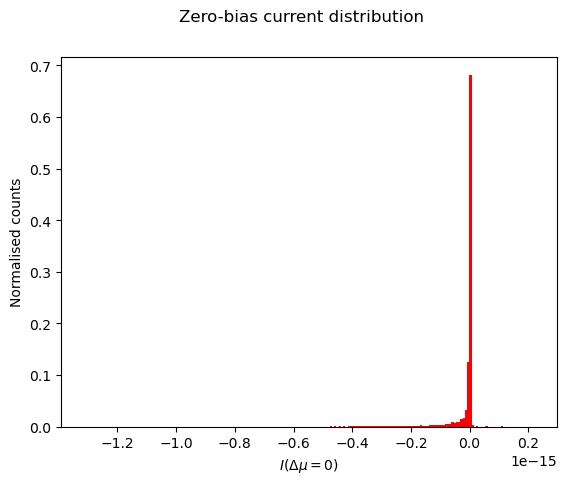

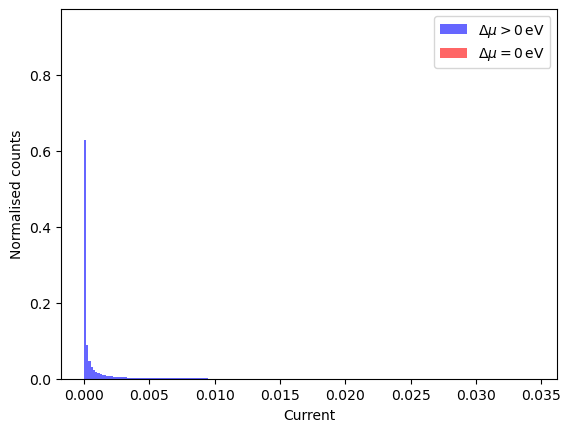

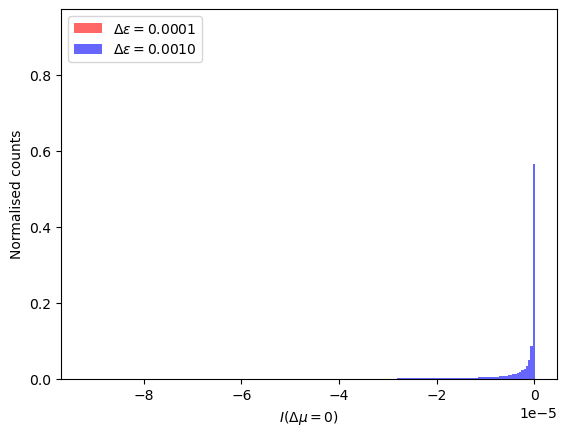

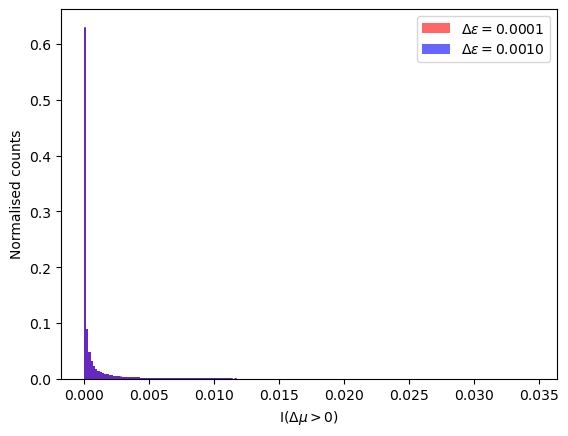

In [32]:
npydir_fine = 'MAC_aligned_laser-focused_max_dmu0.02_no_shift'
I_fine = np.moveaxis(np.load('%s/current_non-dis.npy'%npydir_fine),2,-1) # keep shape consistent with previous current array

I_0bias_fine = I_fine[:,:,:,0]

print('Max zero-bias current for fine grid =  ', np.max(I_0bias_fine))

#Histogram of zero-bias current
plt_utils.histogram(I_0bias_fine, nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True)
plt.suptitle('Zero-bias current distribution')
plt.show()

#Histogram of all current, with dmu = 0 and dmu > 0 plotted separately
plt_utils.histogram(I_fine[:,:,:,1:],nbins=200,xlabel='Current',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\mu > 0\,$eV'})
plt_utils.histogram(I_0bias_fine,nbins=10,xlabel='Current',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\mu = 0\,$eV'})
plt.legend()
plt.show()

# Compare zero-bias current distributions between small and large gammas
plt_utils.histogram(I_0bias_fine,nbins=10,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\\varepsilon = {:5.4f}$'.format(de_fine)})
plt_utils.histogram(I_zero_bias,nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\\varepsilon = {:5.4f}$'.format(de)})
plt.legend()
plt.show()

# Compare finite bias current distributions between small and large gammas
plt_utils.histogram(I_fine[:,:,:,1:],nbins=200,xlabel='I($\Delta\mu > 0$)',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\\varepsilon = {:5.4f}$'.format(de_fine)})
plt_utils.histogram(I[:,:,:,1:],nbins=200,xlabel='I($\Delta\mu > 0$)',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\\varepsilon = {:5.4f}$'.format(de)})
plt.legend()
plt.show()

**Remarks:** 
* While refining the energy grid suppresses zero-bias current (as wanted), it seems to have very little impact on $I(\Delta\mu > 0)$.
* This is not the case when broadening the Lorentzians, which also fixes the zero-bias current bug, while dramatically increasing $I(\Delta\mu > 0)$.